In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd gdrive/MyDrive/Thesis_testing_youtube/sliding_window_1_sec/

/content/gdrive/MyDrive/Thesis_testing_youtube/sliding_window_1_sec


In [3]:
import pandas as pd
import os
import librosa
import numpy as np
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

from tqdm.notebook import tqdm

from sklearn.preprocessing import OneHotEncoder

# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [4]:
X = np.load('slidingwindow_mfcc_X_data_4032files_1secSW.npy')
Y = np.load('slidingwindow_mfcc_Y_data_4032files_1secSW.npy', allow_pickle='True')

In [6]:
import numpy


def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = numpy.empty(a.shape, dtype=a.dtype)
    shuffled_b = numpy.empty(b.shape, dtype=b.dtype)
    permutation = numpy.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [7]:
X_pre, y_pre = shuffle_in_unison(X, Y)
X_pre, y_pre = shuffle_in_unison(X_pre, y_pre)

In [8]:
labels = ['Al-Fil','Quraish','Al-Maun','Al-Kauthar','Al-Kafirun','An-Nasr','Al-Masad','Al-Ikhlas','Al-Falaq', 'An-Nas']

y_enc = np.array([labels.index(l) for l in y_pre])
y_enc = tf.one_hot(y_enc, len(labels))
y_enc = y_enc.numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_enc, test_size=0.1, shuffle=True,  random_state=42)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3628, 704, 40) (3628, 10)
(404, 704, 40) (404, 10)


In [11]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 704, 40, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 704, 40, 1)

print(X_train_reshaped.shape, y_train.shape)
print(X_test_reshaped.shape, y_test.shape)

(3628, 704, 40, 1) (3628, 10)
(404, 704, 40, 1) (404, 10)


13/13 [==============================] - 11s 876ms/step
Normalized Confusion Matrix:
            Al-Fil  Quraish  Al-Maun  Al-Kauthar  Al-Kafirun  An-Nasr  \
Al-Fil        0.88      0.0     0.02        0.00        0.00     0.00   
Quraish       0.02      0.6     0.06        0.00        0.00     0.00   
Al-Maun       0.02      0.0     0.84        0.00        0.00     0.00   
Al-Kauthar    0.00      0.0     0.00        0.64        0.00     0.00   
Al-Kafirun    0.00      0.0     0.00        0.00        1.00     0.00   
An-Nasr       0.00      0.0     0.00        0.00        0.04     0.62   
Al-Masad      0.00      0.0     0.00        0.00        0.00     0.02   
Al-Ikhlas     0.00      0.0     0.00        0.00        0.02     0.00   
Al-Falaq      0.00      0.0     0.00        0.00        0.00     0.00   
An-Nas        0.00      0.0     0.00        0.00        0.00     0.00   

            Al-Masad  Al-Ikhlas  Al-Falaq  An-Nas  
Al-Fil          0.02       0.00       0.0    0.00  
Quraish

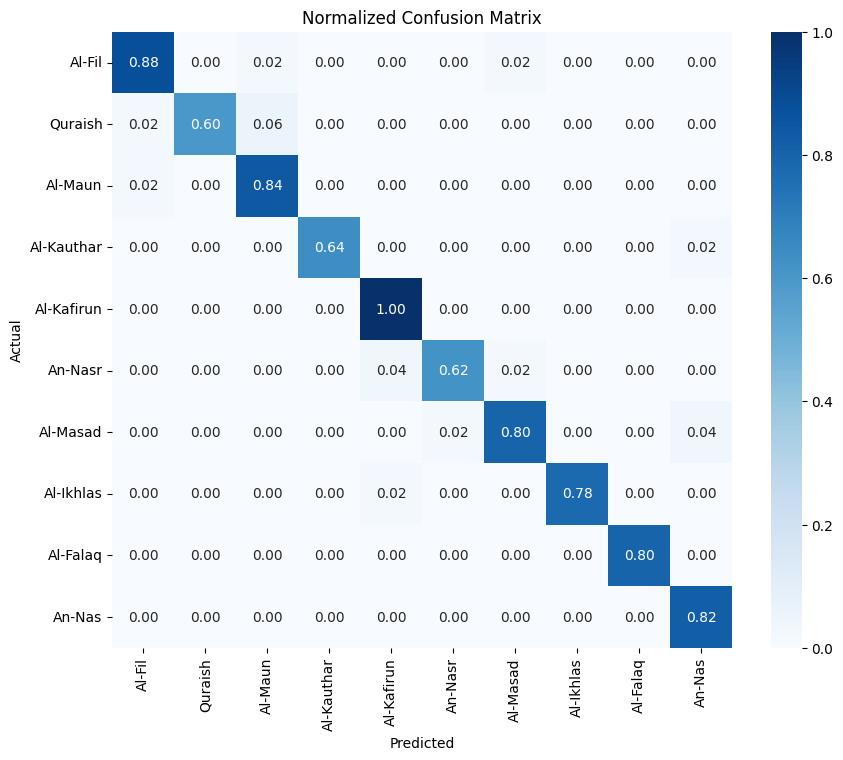

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import load_model

label_names = ['Al-Fil', 'Quraish', 'Al-Maun', 'Al-Kauthar', 'Al-Kafirun', 'An-Nasr', 'Al-Masad', 'Al-Ikhlas', 'Al-Falaq', 'An-Nas']
# Load the model from H5 file
model = load_model('Model_CNN2D_startwithnumpylengthsamemfcc_1sec_4032files_90_10_size_result 100_96.29.h5')

# Load your test data (X_test, y_test) or use your own data
# X_test = ...
# y_test = ...

# Convert one-hot encoded labels to integers if needed
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_max = np.max(cm)
normalized_cm = cm / cm_max  # Normalize the confusion matrix

# Create a DataFrame for normalized confusion matrix
cm_df = pd.DataFrame(normalized_cm, columns=label_names, index=label_names)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print confusion matrix and F1 score
print("Normalized Confusion Matrix:")
print(cm_df)
print("\nF1 Score:", f1)

# Plot normalized confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues')  # Format values as floating-point with 2 decimals
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


13/13 [==============================] - 18s 1s/step
Confusion Matrix:
            Al-Fil  Quraish  Al-Maun  Al-Kauthar  Al-Kafirun  An-Nasr  \
Al-Fil          44        0        1           0           0        0   
Quraish          1       30        3           0           0        0   
Al-Maun          1        0       42           0           0        0   
Al-Kauthar       0        0        0          32           0        0   
Al-Kafirun       0        0        0           0          50        0   
An-Nasr          0        0        0           0           2       31   
Al-Masad         0        0        0           0           0        1   
Al-Ikhlas        0        0        0           0           1        0   
Al-Falaq         0        0        0           0           0        0   
An-Nas           0        0        0           0           0        0   

            Al-Masad  Al-Ikhlas  Al-Falaq  An-Nas  
Al-Fil             1          0         0       0  
Quraish            0 

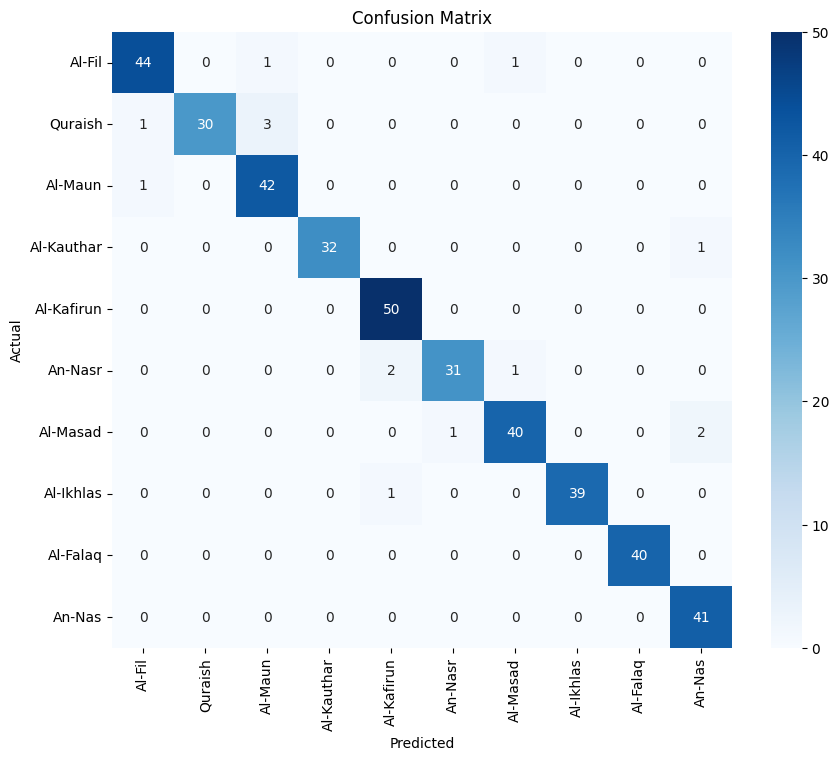

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import load_model

label_names = ['Al-Fil','Quraish','Al-Maun','Al-Kauthar','Al-Kafirun','An-Nasr','Al-Masad','Al-Ikhlas','Al-Falaq', 'An-Nas']
# Load the model from H5 file
model = load_model('Model_CNN2D_startwithnumpylengthsamemfcc_1sec_4032files_90_10_size_result 100_96.29.h5')

# # Load your test data (X_test, y_test) or use your own data
# X_test = ...
# y_test = ...

# Convert one-hot encoded labels to integers if needed
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_df = pd.DataFrame(cm, columns=label_names, index=label_names)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print confusion matrix and F1 score
print("Confusion Matrix:")
print(cm_df)
print("\nF1 Score:", f1)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

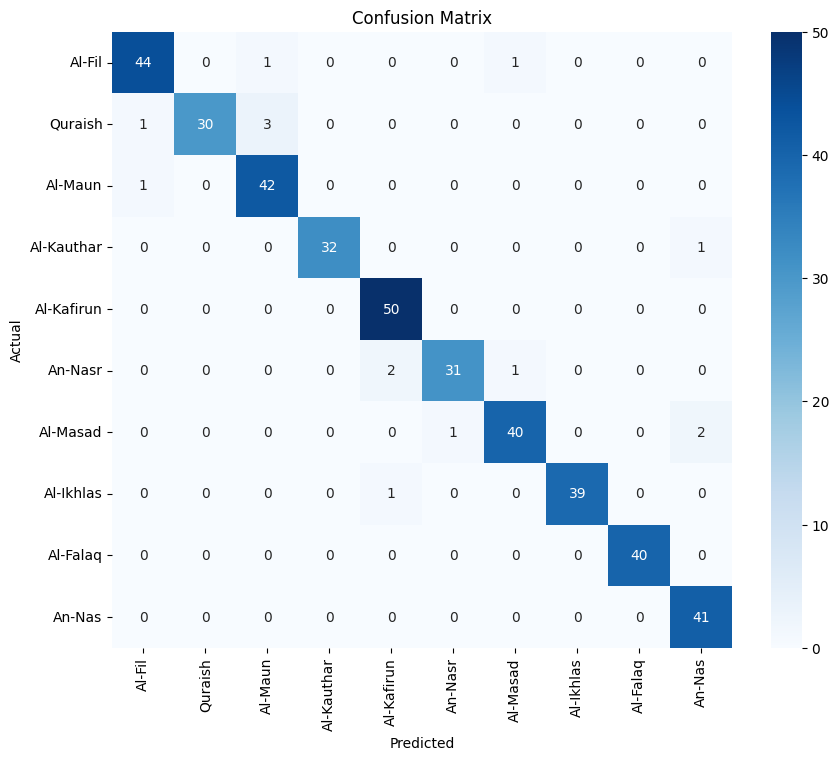

In [22]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
true_labels = y_test
predicted_values = y_pred_classes

In [15]:
from sklearn.metrics import f1_score, mean_squared_error, precision_score, recall_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_values, average='weighted')

# Calculate RMSE
rmse = mean_squared_error(true_labels, predicted_values, squared=False)

# Calculate precision
precision = precision_score(true_labels, predicted_values, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_values, average='weighted')

# Print the results
print("F1 Score:", f1)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.9627521309724058
RMSE: 0.5335292544430292
Precision: 0.9641710576556893
Recall: 0.9628712871287128
